In [1]:
import numpy as np

In [60]:
with open('optuna_shuffle_data.out', 'r') as f:
    line = []
    while 'Training Epochs' not in str(line):
        line = f.readline()
    split_line = line.split("[")
    epoch_frac = split_line[0].split("|")[-1]
    epoch_num = int(epoch_frac.split("/")[0])
    epoch_total = int(epoch_frac.split("/")[1])
    gcn_train_times = [0 for _ in range(epoch_total)]
    for line in f:
        if 'Training Epochs' not in str(line): break
        split_line = line.split("[")
        epoch_frac = split_line[0].split("|")[-1]
        epoch_num = int(epoch_frac.split("/")[0])
        if epoch_num > 1:
            time_amassed_at_epoch = split_line[1].split("<")[0].split(":")
            num_sec = int(time_amassed_at_epoch[0]) * 60 + int(time_amassed_at_epoch[1])
            gcn_train_times[epoch_num - 1] = num_sec / (60**2)
gcn_train_times

[0,
 0.0025,
 0.0030555555555555557,
 0.0038888888888888888,
 0.004722222222222222,
 0.005277777777777778,
 0.006111111111111111,
 0.006666666666666667,
 0.0075,
 0.008333333333333333,
 0.008888888888888889,
 0.009722222222222222,
 0.010277777777777778,
 0.011111111111111112,
 0.011666666666666667,
 0.0125,
 0.013333333333333334,
 0.013888888888888888,
 0.014722222222222222,
 0.015277777777777777,
 0.01611111111111111,
 0.016944444444444446,
 0.0175,
 0.018333333333333333,
 0.01888888888888889,
 0.01972222222222222,
 0.020277777777777777,
 0.021111111111111112,
 0.021944444444444444,
 0.0225,
 0.023333333333333334,
 0.02388888888888889,
 0.024722222222222222,
 0.025555555555555557,
 0.026111111111111113,
 0.026944444444444444,
 0.0275,
 0.028333333333333332,
 0.028888888888888888,
 0.029722222222222223,
 0.030555555555555555,
 0.03111111111111111,
 0.03194444444444444,
 0.0325,
 0.03333333333333333,
 0.034166666666666665,
 0.034722222222222224,
 0.035555555555555556,
 0.036111111111111

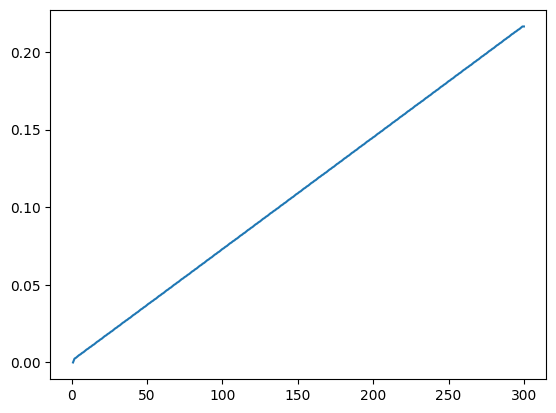

In [61]:
from matplotlib import pyplot as plt

plt.plot(range(1, epoch_total+1), gcn_train_times)

In [62]:
with open('slurm-9512660.out', 'r') as f:
    line = []
    while 'Training Epochs' not in str(line):
        line = f.readline()
    print(line)
    split_line = line.split("[")
    epoch_frac = split_line[0].split("|")[-1]
    epoch_num = int(epoch_frac.split("/")[0])
    cnn_epoch_total = int(epoch_frac.split("/")[1])
    cnn_train_times = [0 for _ in range(cnn_epoch_total)]
    last_train_epoch = 0
    for line in f:
        if 'Stopping' in str(line): break
        if len(line.strip()) > 0 and 'Training' in str(line):
            print(line)
            split_line = line.split("[")
            epoch_frac = split_line[0].split("|")[-1]
            epoch_num = int(epoch_frac.split("/")[0])
            if epoch_num > 1:
                time_amassed_at_epoch = split_line[1].split("<")[0].split(":")
                num_sec = int(time_amassed_at_epoch[-2]) * 60 + int(time_amassed_at_epoch[-1])
                if len(time_amassed_at_epoch) == 3: num_sec += 60**2 * int(time_amassed_at_epoch[-3])
                cnn_train_times[epoch_num - 1] = num_sec / (60 ** 2)
                last_train_epoch = epoch_num
cnn_train_times = cnn_train_times[:last_train_epoch]

Training Epochs:   0%|          | 0/200 [00:00<?, ?it/s]

Training Epochs:   0%|          | 1/200 [19:28<64:36:18, 1168.74s/it]

Training Epochs:   1%|          | 2/200 [38:57<64:16:00, 1168.49s/it]

Training Epochs:   2%|▏         | 3/200 [58:17<63:43:46, 1164.60s/it]

Training Epochs:   2%|▏         | 4/200 [1:17:35<63:15:51, 1162.00s/it]

Training Epochs:   2%|▎         | 5/200 [1:37:19<63:22:59, 1170.15s/it]

Training Epochs:   3%|▎         | 6/200 [1:56:17<62:28:10, 1159.23s/it]

Training Epochs:   4%|▎         | 7/200 [2:15:16<61:47:40, 1152.65s/it]

Training Epochs:   4%|▍         | 8/200 [2:34:52<61:52:29, 1160.15s/it]

Training Epochs:   4%|▍         | 9/200 [2:54:13<61:33:51, 1160.38s/it]

Training Epochs:   5%|▌         | 10/200 [3:13:22<61:03:27, 1156.88s/it]

Training Epochs:   6%|▌         | 11/200 [3:32:16<60:21:26, 1149.67s/it]

Training Epochs:   6%|▌         | 12/200 [3:51:05<59:42:53, 1143.48s/it]

Training Epochs:   6%|▋         | 13/200 [4:09:59<59:14:57, 1140.63s/

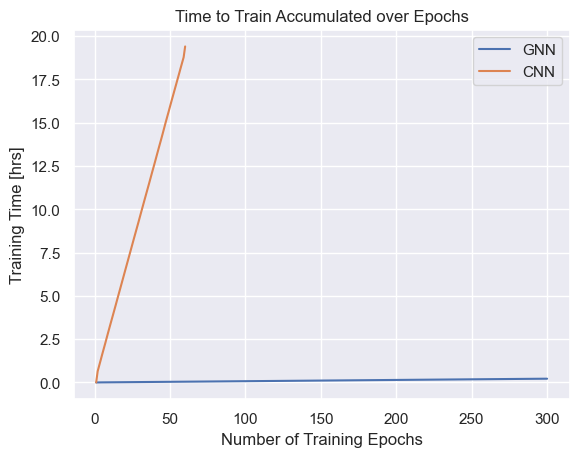

In [125]:
plt.plot(range(1, epoch_total+1), gcn_train_times, label="GNN")
plt.plot(range(1, last_train_epoch+1), cnn_train_times, label="CNN")
plt.legend()
plt.xlabel('Number of Training Epochs')
plt.ylabel('Training Time [hrs]')
plt.title('Time to Train Accumulated over Epochs')
# plt.show()
plt.savefig('epoch_train_time.jpeg')

In [83]:
multi_gcn_train_times = []
with open('optuna_shuffle_data.out', 'r') as f:
    for line in f:
        if 'Training Epochs: 100%|██████████| 300/300' in str(line):
            line = str(f.readline())
            split_line = line.split("[")
            time_amassed_per_model = split_line[1].split("<")[0].split(":")
            num_sec = int(time_amassed_per_model[0]) * 60 + int(time_amassed_per_model[1])
            prev = multi_gcn_train_times[-1] if len (multi_gcn_train_times) > 0 else 0
            multi_gcn_train_times.append((num_sec / (60**2)) + prev)
multi_gcn_train_times

[0.21638888888888888,
 0.548611111111111,
 0.7999999999999999,
 1.2780555555555555,
 1.5183333333333333,
 2.0430555555555556,
 2.325555555555556,
 2.756111111111111,
 3.0391666666666666,
 3.3602777777777777,
 3.7905555555555557,
 3.9425,
 4.3677777777777775,
 4.798333333333333,
 5.224166666666666,
 5.582222222222222,
 5.867222222222222,
 6.392222222222222,
 6.7125,
 7.238888888888889,
 7.5975,
 7.929722222222223,
 8.126944444444446,
 8.50527777777778,
 8.745555555555557,
 9.028611111111113,
 9.605000000000002,
 9.845555555555558,
 10.130833333333335,
 10.463055555555558,
 10.678611111111113,
 10.96388888888889,
 11.248333333333335,
 11.569444444444446,
 11.92666666666667,
 12.141944444444448,
 12.473333333333336,
 12.866666666666669,
 13.198888888888892,
 13.382500000000002,
 13.760555555555557,
 14.045000000000002,
 14.365277777777779,
 14.685555555555556,
 15.0425,
 15.363333333333333,
 15.68388888888889,
 16.004722222222224,
 16.3625,
 16.683611111111112,
 17.076944444444447,
 17.39

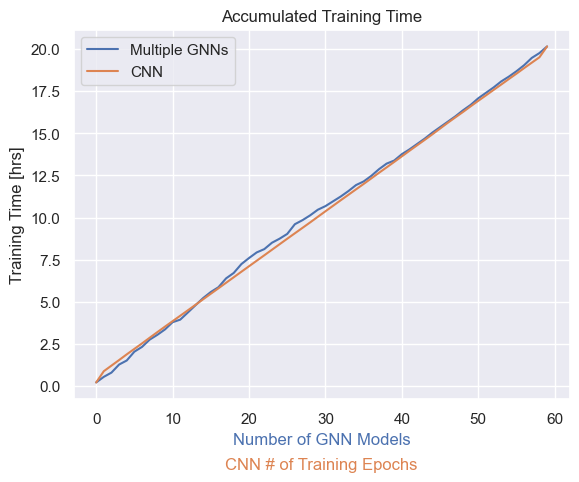

In [126]:
# plt.plot(range(1, len(multi_gcn_train_times) + 1), multi_gcn_train_times, label="Multiple GNNs")
# plt.plot(range(1, last_train_epoch+1), cnn_train_times, label="CNN")
# plt.legend()
# plt.xlabel('Number of Training Epochs')
# plt.ylabel('Training Time [hrs]')
# plt.title('Time to Train Accumulated over Epochs')
# plt.show()

fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
# ax3=fig.add_subplot(111, label="3", frame_on=False)

l1 = ax.plot(multi_gcn_train_times[:last_train_epoch], label="Multiple GNNs", color='b')[0]
ax.set_xlabel("Number of GNN Models", color="b")
ax.set_ylabel('Training Time [hrs]')

l2 = ax2.plot(range(1, last_train_epoch+1), cnn_train_times, label="CNN", color="C1")[0]
ax2.set_xlabel('\n\n\nCNN # of Training Epochs', color="C1") 
ax2.xaxis.set_label_position('bottom') 
ax2.set_xticks([])
ax2.set_yticks([])

ax.legend([l1, l2], ["Multiple GNNs", "CNN"])
plt.title("Accumulated Training Time")
# plt.show()
plt.savefig('cnnvsmultignn.jpeg')


In [120]:
import seaborn as sns

In [121]:
sns.set_theme()
